In [2]:
import numpy as np
from matplotlib import pyplot as plt

Text(0.5, -0.09, 'If we assume that utility can be ordered as: 2 success is the best outcome, followed by 1 success, followed by zero successes, then maximising the number of successes should be the chosen strategy. In this case, always choose the highest total modifier')

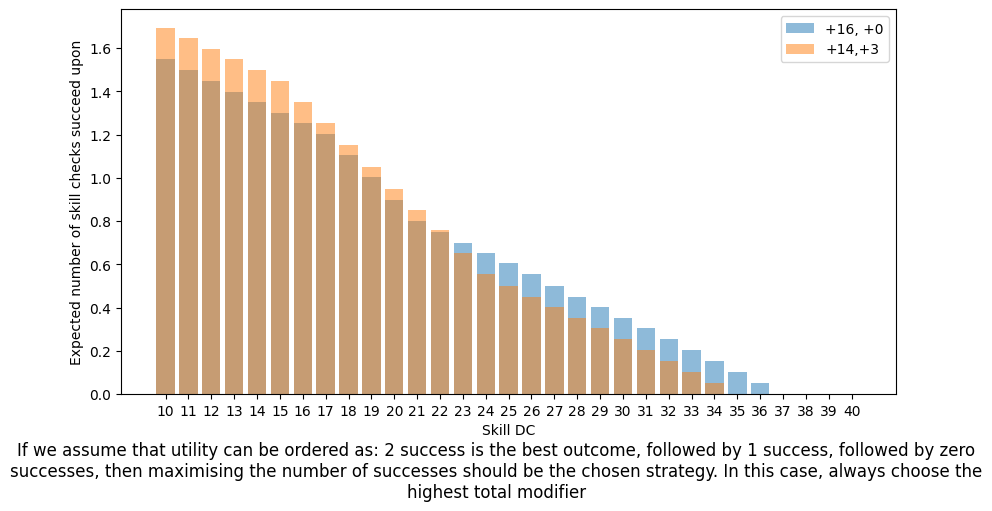

In [4]:
# how many successes per DC? let's scroll from 10 to 40 and add up the number of success per case

mc_iters = 10000

d20_r1_c1 = np.zeros(mc_iters)
d20_r2_c1 = np.zeros(mc_iters)

d20_r1_c2 = np.zeros(mc_iters)
d20_r2_c2 = np.zeros(mc_iters)


for i in np.arange(mc_iters):
  # roll the first dice
  d20_r1 = np.random.randint(1, high=21)

  # roll the second dice
  d20_r2 = np.random.randint(1, high=21)

  # case 1: add 10 to one roll, add 0 to the other
  d20_r1_c1[i] = d20_r1 + 16
  d20_r2_c1[i] = d20_r2 + 0

  # case 2: add 5 to each roll
  d20_r1_c2[i] = d20_r1+14
  d20_r2_c2[i] = d20_r2+3

# plot
# inclusive
start_dc = 10
end_dc = 40

dc_list = np.arange(start_dc,end_dc+1)

num_pass_c1 = np.zeros(end_dc-start_dc+1)
num_pass_c2 = np.zeros(end_dc-start_dc+1)

for idx,dc in enumerate(np.arange(10,41)):

  # how many entries in the first case beat the dc?
  d20_r1_c1_pass = d20_r1_c1 >= dc
  d20_r1_c1_pass = d20_r1_c1_pass.astype(int)

  d20_r2_c1_pass = d20_r2_c1 >= dc
  d20_r2_c1_pass = d20_r2_c1_pass.astype(int)

  # add the two together to determine the total number of successes:
  d20_c1_pass_tot = d20_r1_c1_pass + d20_r2_c1_pass

  # store the number of successes
  num_pass_c1[idx] = np.mean(d20_c1_pass_tot)

  # how many entries in the second case beat the dc?
  d20_r1_c2_pass = d20_r1_c2 >= dc
  d20_r1_c2_pass = d20_r1_c2_pass.astype(int)

  d20_r2_c2_pass = d20_r2_c2 >= dc
  d20_r2_c2_pass = d20_r2_c2_pass.astype(int)

  # add the two together to determine the total number of successes:
  d20_c2_pass_tot = d20_r1_c2_pass + d20_r2_c2_pass

  num_pass_c2[idx] = np.mean(d20_c2_pass_tot)

plt.figure(figsize=(10,5))
plt.bar(dc_list,num_pass_c1, alpha = 0.5)
plt.bar(dc_list,num_pass_c2, alpha = 0.5)
plt.xticks(dc_list)
plt.xlabel("Skill DC")
plt.ylabel("Expected number of skill checks succeed upon")
plt.legend(["+16, +0", "+14,+3"])
plt.figtext(0.5, -0.09, "If we assume that utility can be ordered as: 2 success is the best outcome, followed by 1 success, followed by zero successes, then maximising the number of successes should be the chosen strategy. In this case, always choose the highest total modifier", wrap=True, horizontalalignment='center', fontsize=12)

Text(0.5, -0.09, 'If we assume that utility can be ordered as: 2 success is the best outcome and then 1 success and 0 successes have the same utility (2 successes or bust), then maximising the number of double successes should be the chosen strategy. In this case the combination of modifiers chosen depends on the skill DC')

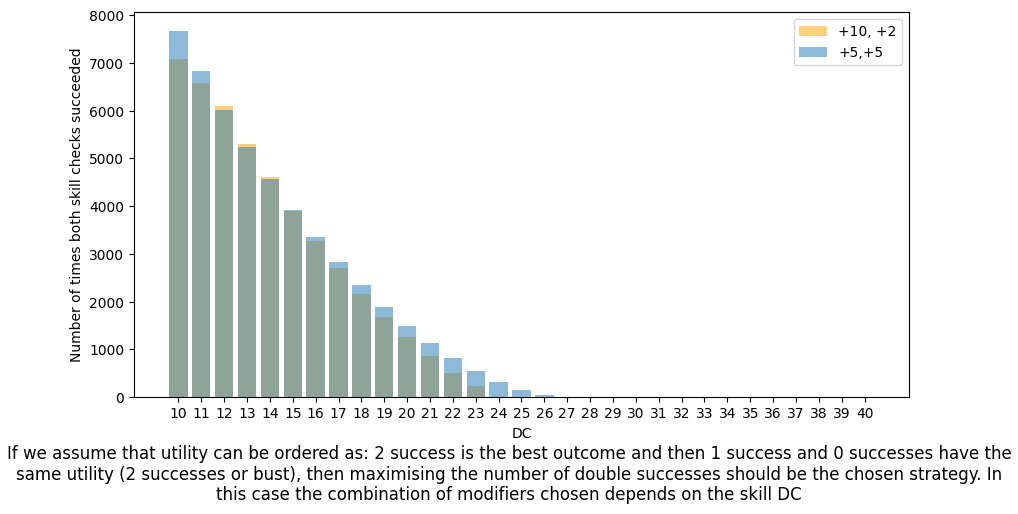

In [150]:
# how many successes per DC? let's scroll from 10 to 40 and add up the number of success per case

mc_iters = 10000

d20_r1_c1 = np.zeros(mc_iters)
d20_r2_c1 = np.zeros(mc_iters)

d20_r1_c2 = np.zeros(mc_iters)
d20_r2_c2 = np.zeros(mc_iters)


for i in np.arange(mc_iters):
  # roll the first dice
  d20_r1 = np.random.randint(1, high=21)

  # roll the second dice
  d20_r2 = np.random.randint(1, high=21)

  # case 1: add 10 to one roll, add 0 to the other
  d20_r1_c1[i] = d20_r1 + 10
  d20_r2_c1[i] = d20_r2 + 2

  # case 2: add 5 to each roll
  d20_r1_c2[i] = d20_r1+5
  d20_r2_c2[i] = d20_r2+5


# inclusive
start_dc = 10
end_dc = 40

dc_list = np.arange(start_dc,end_dc+1)

num_2pass_c1 = np.zeros(end_dc-start_dc+1)
num_2pass_c2 = np.zeros(end_dc-start_dc+1)

for idx,dc in enumerate(np.arange(10,41)):

  # how many entries in the first case beat the dc?
  d20_r1_c1_pass = d20_r1_c1 >= dc
  d20_r1_c1_pass = d20_r1_c1_pass.astype(int)

  d20_r2_c1_pass = d20_r2_c1 >= dc
  d20_r2_c1_pass = d20_r2_c1_pass.astype(int)

  # add the two together to determine the total number of successes:
  d20_c1_pass_tot = d20_r1_c1_pass + d20_r2_c1_pass

  # how many instances were there exactly TWO passes?
  num_2pass_c1[idx] = np.count_nonzero(d20_c1_pass_tot == 2)

  # how many entries in the second case beat the dc?
  d20_r1_c2_pass = d20_r1_c2 >= dc
  d20_r1_c2_pass = d20_r1_c2_pass.astype(int)

  d20_r2_c2_pass = d20_r2_c2 >= dc
  d20_r2_c2_pass = d20_r2_c2_pass.astype(int)

  # add the two together to determine the total number of successes:
  d20_c2_pass_tot = d20_r1_c2_pass + d20_r2_c2_pass

  # how many instances were there exactly TWO passes?
  num_2pass_c2[idx] = np.count_nonzero(d20_c2_pass_tot == 2)

#plot
plt.figure(figsize=(10,5))
plt.bar(dc_list,num_2pass_c1, color = "Orange", alpha = 0.5)
plt.bar(dc_list,num_2pass_c2, alpha = 0.5)
plt.xticks(dc_list)
plt.xlabel("DC")
plt.ylabel("Number of times both skill checks succeeded")
plt.legend(["+10, +2", "+5,+5"])
plt.figtext(0.5, -0.09, "If we assume that utility can be ordered as: 2 success is the best outcome and then 1 success and 0 successes have the same utility (2 successes or bust), then maximising the number of double successes should be the chosen strategy. In this case the combination of modifiers chosen depends on the skill DC", wrap=True, horizontalalignment='center', fontsize=12)


Text(0.5, -0.09, 'Oogway Garak, int based stealth and survival modifiers')

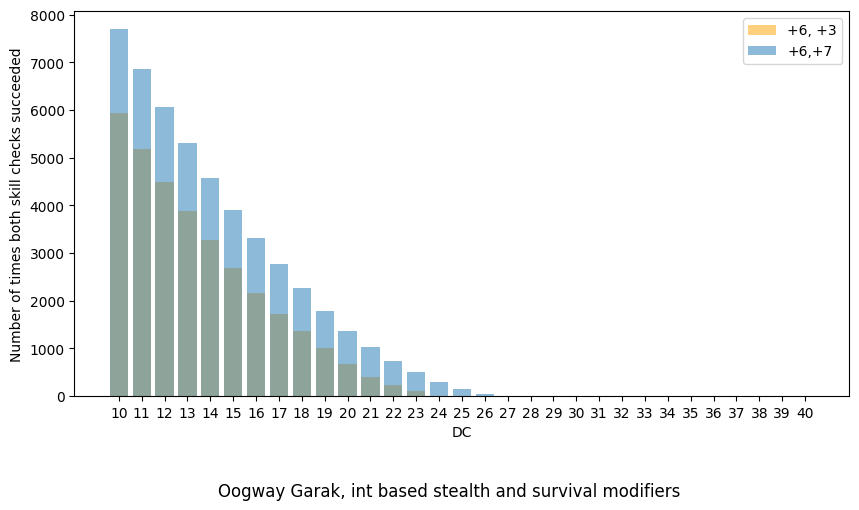

In [155]:
# how many successes per DC? let's scroll from 10 to 40 and add up the number of success per case

mc_iters = 10000

d20_r1_c1 = np.zeros(mc_iters)
d20_r2_c1 = np.zeros(mc_iters)

d20_r1_c2 = np.zeros(mc_iters)
d20_r2_c2 = np.zeros(mc_iters)


for i in np.arange(mc_iters):
  # roll the first dice
  d20_r1 = np.random.randint(1, high=21)

  # roll the second dice
  d20_r2 = np.random.randint(1, high=21)

  # case 1: add 10 to one roll, add 0 to the other
  d20_r1_c1[i] = d20_r1 + 6
  d20_r2_c1[i] = d20_r2 + 3

  # case 2: add 5 to each roll
  d20_r1_c2[i] = d20_r1+6
  d20_r2_c2[i] = d20_r2+7


# inclusive
start_dc = 10
end_dc = 40

dc_list = np.arange(start_dc,end_dc+1)

num_2pass_c1 = np.zeros(end_dc-start_dc+1)
num_2pass_c2 = np.zeros(end_dc-start_dc+1)

for idx,dc in enumerate(np.arange(10,41)):

  # how many entries in the first case beat the dc?
  d20_r1_c1_pass = d20_r1_c1 >= dc
  d20_r1_c1_pass = d20_r1_c1_pass.astype(int)

  d20_r2_c1_pass = d20_r2_c1 >= dc
  d20_r2_c1_pass = d20_r2_c1_pass.astype(int)

  # add the two together to determine the total number of successes:
  d20_c1_pass_tot = d20_r1_c1_pass + d20_r2_c1_pass

  # how many instances were there exactly TWO passes?
  num_2pass_c1[idx] = np.count_nonzero(d20_c1_pass_tot == 2)

  # how many entries in the second case beat the dc?
  d20_r1_c2_pass = d20_r1_c2 >= dc
  d20_r1_c2_pass = d20_r1_c2_pass.astype(int)

  d20_r2_c2_pass = d20_r2_c2 >= dc
  d20_r2_c2_pass = d20_r2_c2_pass.astype(int)

  # add the two together to determine the total number of successes:
  d20_c2_pass_tot = d20_r1_c2_pass + d20_r2_c2_pass

  # how many instances were there exactly TWO passes?
  num_2pass_c2[idx] = np.count_nonzero(d20_c2_pass_tot == 2)

#plot
plt.figure(figsize=(10,5))
plt.bar(dc_list,num_2pass_c1, color = "Orange", alpha = 0.5)
plt.bar(dc_list,num_2pass_c2, alpha = 0.5)
plt.xticks(dc_list)
plt.xlabel("DC")
plt.ylabel("Number of times both skill checks succeeded")
plt.legend(["+6, +3", "+6,+7"])
plt.figtext(0.5, -0.09, "Oogway Garak, int based stealth and survival modifiers", wrap=True, horizontalalignment='center', fontsize=12)


Text(0.5, -0.09, 'Oogway Garak, dex based stealth and survival modifiers')

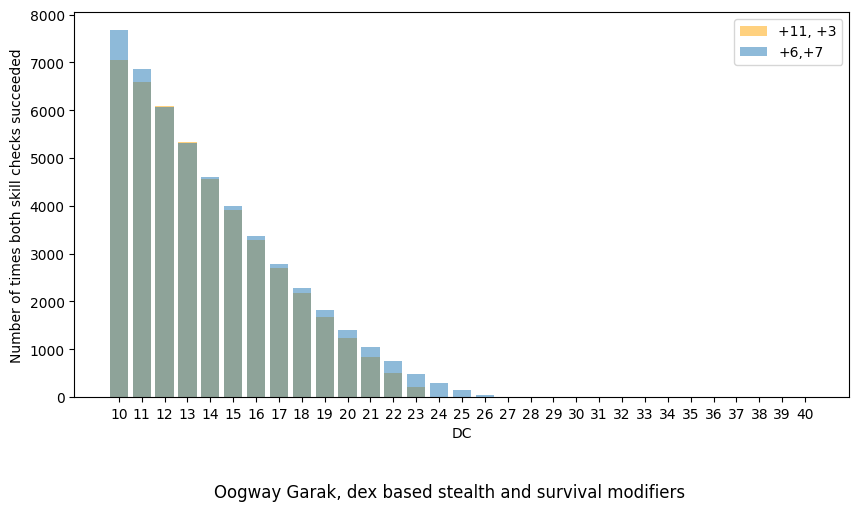

In [154]:
# how many successes per DC? let's scroll from 10 to 40 and add up the number of success per case

mc_iters = 10000

d20_r1_c1 = np.zeros(mc_iters)
d20_r2_c1 = np.zeros(mc_iters)

d20_r1_c2 = np.zeros(mc_iters)
d20_r2_c2 = np.zeros(mc_iters)


for i in np.arange(mc_iters):
  # roll the first dice
  d20_r1 = np.random.randint(1, high=21)

  # roll the second dice
  d20_r2 = np.random.randint(1, high=21)

  # case 1: add 10 to one roll, add 0 to the other
  d20_r1_c1[i] = d20_r1 + 11
  d20_r2_c1[i] = d20_r2 + 3

  # case 2: add 5 to each roll
  d20_r1_c2[i] = d20_r1+6
  d20_r2_c2[i] = d20_r2+7


# inclusive
start_dc = 10
end_dc = 40

dc_list = np.arange(start_dc,end_dc+1)

num_2pass_c1 = np.zeros(end_dc-start_dc+1)
num_2pass_c2 = np.zeros(end_dc-start_dc+1)

for idx,dc in enumerate(np.arange(10,41)):

  # how many entries in the first case beat the dc?
  d20_r1_c1_pass = d20_r1_c1 >= dc
  d20_r1_c1_pass = d20_r1_c1_pass.astype(int)

  d20_r2_c1_pass = d20_r2_c1 >= dc
  d20_r2_c1_pass = d20_r2_c1_pass.astype(int)

  # add the two together to determine the total number of successes:
  d20_c1_pass_tot = d20_r1_c1_pass + d20_r2_c1_pass

  # how many instances were there exactly TWO passes?
  num_2pass_c1[idx] = np.count_nonzero(d20_c1_pass_tot == 2)

  # how many entries in the second case beat the dc?
  d20_r1_c2_pass = d20_r1_c2 >= dc
  d20_r1_c2_pass = d20_r1_c2_pass.astype(int)

  d20_r2_c2_pass = d20_r2_c2 >= dc
  d20_r2_c2_pass = d20_r2_c2_pass.astype(int)

  # add the two together to determine the total number of successes:
  d20_c2_pass_tot = d20_r1_c2_pass + d20_r2_c2_pass

  # how many instances were there exactly TWO passes?
  num_2pass_c2[idx] = np.count_nonzero(d20_c2_pass_tot == 2)

#plot
plt.figure(figsize=(10,5))
plt.bar(dc_list,num_2pass_c1, color = "Orange", alpha = 0.5)
plt.bar(dc_list,num_2pass_c2, alpha = 0.5)
plt.xticks(dc_list)
plt.xlabel("DC")
plt.ylabel("Number of times both skill checks succeeded")
plt.legend(["+11, +3", "+6,+7"])
plt.figtext(0.5, -0.09, "Oogway Garak, dex based stealth and survival modifiers", wrap=True, horizontalalignment='center', fontsize=12)
